In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data_df = pd.read_csv('vaipfvr.csv', sep=',')
data_df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [14]:
x = data_df.drop('PE', axis = 1).values
y = data_df['PE'].values
# x = variáveis preditoras/independentes
# Y = variável dependentes

In [ ]:
print(x)

In [ ]:
print(y)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
a = model.coef_

In [ ]:
b = model.intercept_

In [ ]:
print(a,b)

[-1.96432098 -0.24009895  0.06801034 -0.15645329] 448.5613177056895


In [17]:
## Fazendo previsões no conjunto de teste
y_pred = model.predict(x_test)
print(y_pred)

model.predict ([[14.96, 41.76, 1024.07, 73.17]])

[431.40245096 458.61474119 462.81967423 ... 432.47380825 436.16417243
 439.00714594]


array([467.34820092])

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9304112159477683

Text(0.5, 1.0, 'Y test versus Predicted Y')

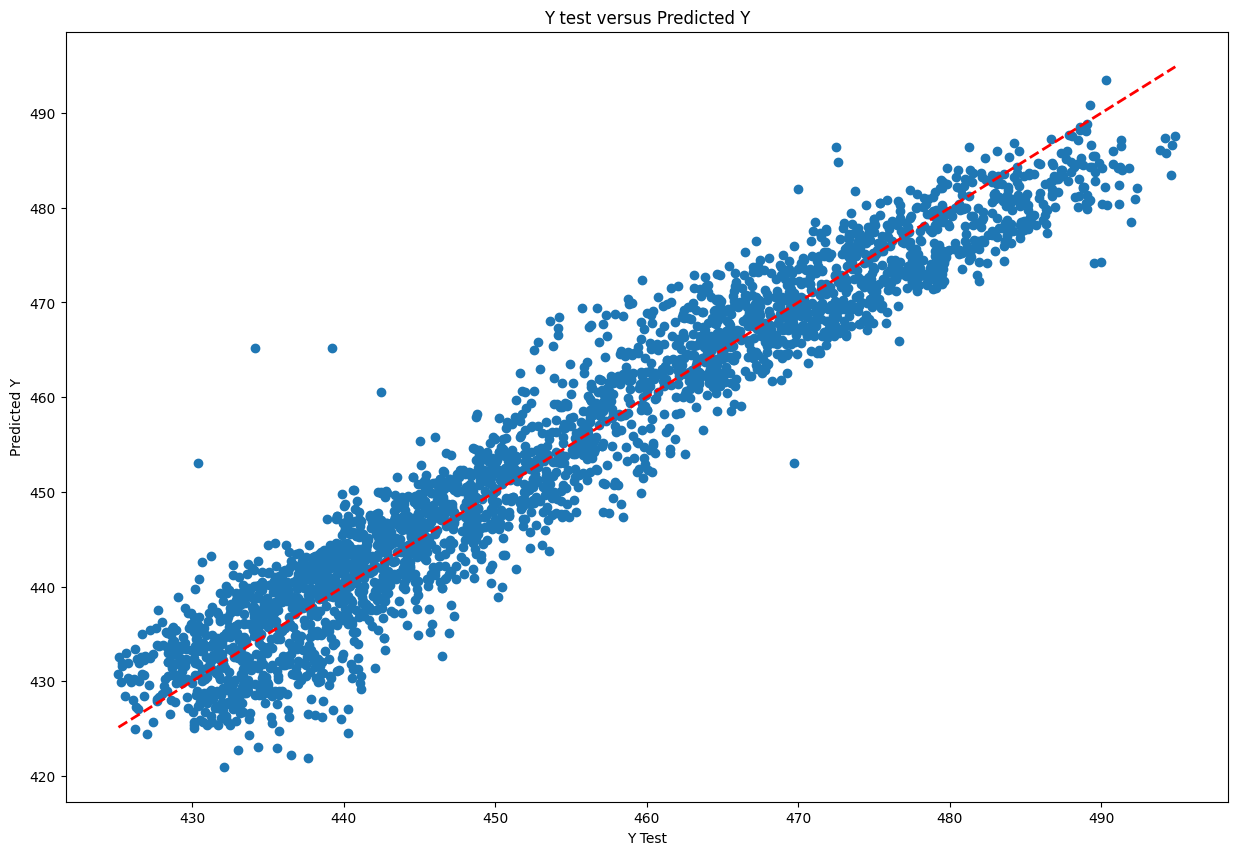

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Melhor Reta')

plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Y test versus Predicted Y')

# **Predicted values**

In [20]:
y_comparation_df = ({'Valor inicial': y, 'Valor treino': y_train, 'Valor teste': y_test, 'Previsão do valor': y_pred, 'Diferença Y teste e o Y previsto': y_test - y_pred})
df = pd.DataFrame.from_dict(y_comparation_df, orient='index')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9558,9559,9560,9561,9562,9563,9564,9565,9566,9567
Valor inicial,463.260000,444.370000,488.560000,446.480000,473.900000,443.670000,467.350000,478.420000,475.980000,477.500000,...,445.3,454.2,444.86,465.45,467.32,460.03,469.62,429.57,435.74,453.28
Valor treino,464.930000,445.330000,450.620000,454.670000,438.520000,435.170000,470.410000,436.620000,429.840000,450.260000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valor teste,431.230000,460.010000,461.140000,445.900000,451.290000,432.680000,477.500000,459.680000,477.500000,444.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Previsão do valor,431.402451,458.614741,462.819674,448.601237,457.879479,429.676856,473.017115,456.532373,474.342524,446.364396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Diferença Y teste e o Y previsto,-0.172451,1.395259,-1.679674,-2.701237,-6.589479,3.003144,4.482885,3.147627,3.157476,-1.374396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 20.36838300288591


MSE: 3.3301252937132277
R2 0.9621118113672877
[467.34820092] [463.3946]


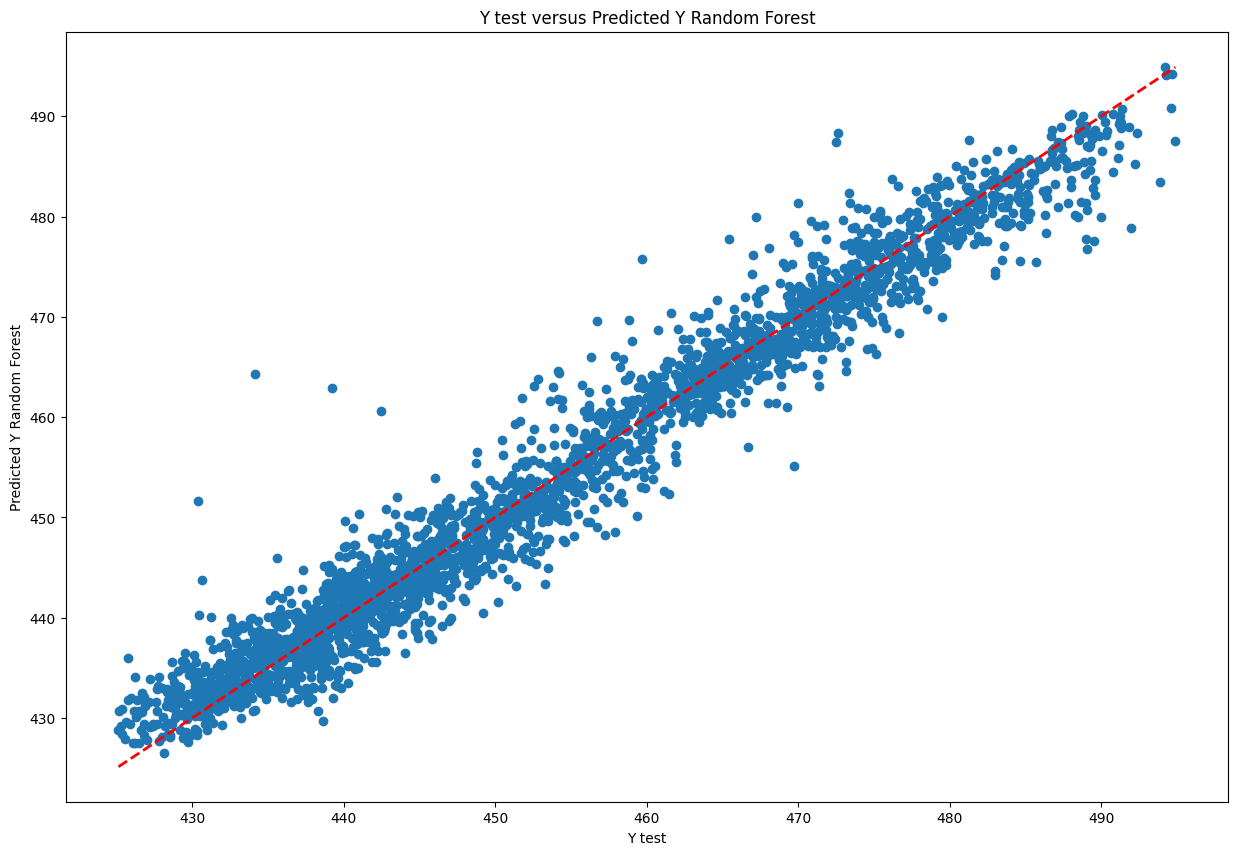

In [22]:
#implementação de uma regressão linear múltipla com Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Criar o modelo de regressão usando RandomForestRegressor
trees = RandomForestRegressor(random_state=0, n_jobs = -1)
trees.fit(x_train, y_train)

y_pred_trees = trees.predict(x_test)


#MSE
mse_random_trees = np.sqrt(mean_squared_error(y_test, y_pred_trees))
print ('MSE:', mse_random_trees)

#R2
r2 = r2_score(y_test, y_pred_trees)
print('R2', r2)

#Gerar o gráfico da regressão
plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred_trees)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Melhor Reta')

plt.xlabel('Y test')
plt.ylabel('Predicted Y Random Forest')
plt.title('Y test versus Predicted Y Random Forest')

#Fazendo uma previsão
#Valor da simulação da previsão anteiror
pred1 = model.predict ([[14.96, 41.76, 1024.07, 73.17]])

#Simulando uma previsão com o modelo
pred2 = trees.predict ([[14.96, 41.76, 1024.07, 73.17]])

print(pred1, pred2)



In [24]:
#Comparação dos MSE
mse_df = pd.DataFrame({'MSE Actual': [mse], 'MSE Trees': [mse_random_trees]})
mse_df.head()

,MSE Actual,MSE Trees
0,20.368383,3.330125
